<a href="https://colab.research.google.com/github/JONGBOK1/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##9주차 수업

###결측치 제거하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [5]:
df.dropna(subset = ['score'],axis = 0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
# score, sex에서 결측값이 있는 행 제거
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df_nomiss['score'] + 1                     # score로 연산

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [11]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

np.float64(4.0)

In [12]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [13]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [14]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [15]:
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [16]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [17]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [18]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [19]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [20]:
exam['math'].isna().sum()  # 결측치 빈도 확인

np.int64(0)

In [21]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [22]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [23]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [24]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [25]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [26]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [27]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [28]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [29]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [30]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.67
2.0,3.00


In [31]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
156,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize
145,nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact


In [32]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


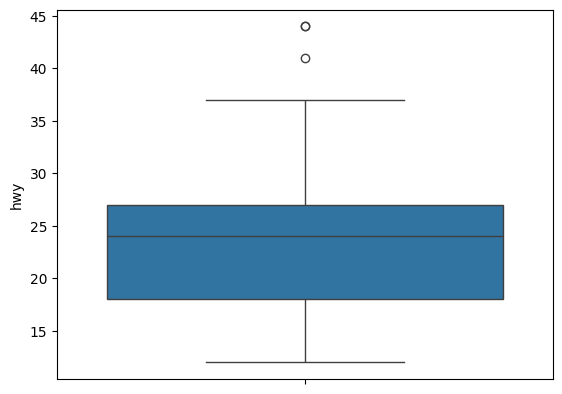

In [33]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

##그림 중요!

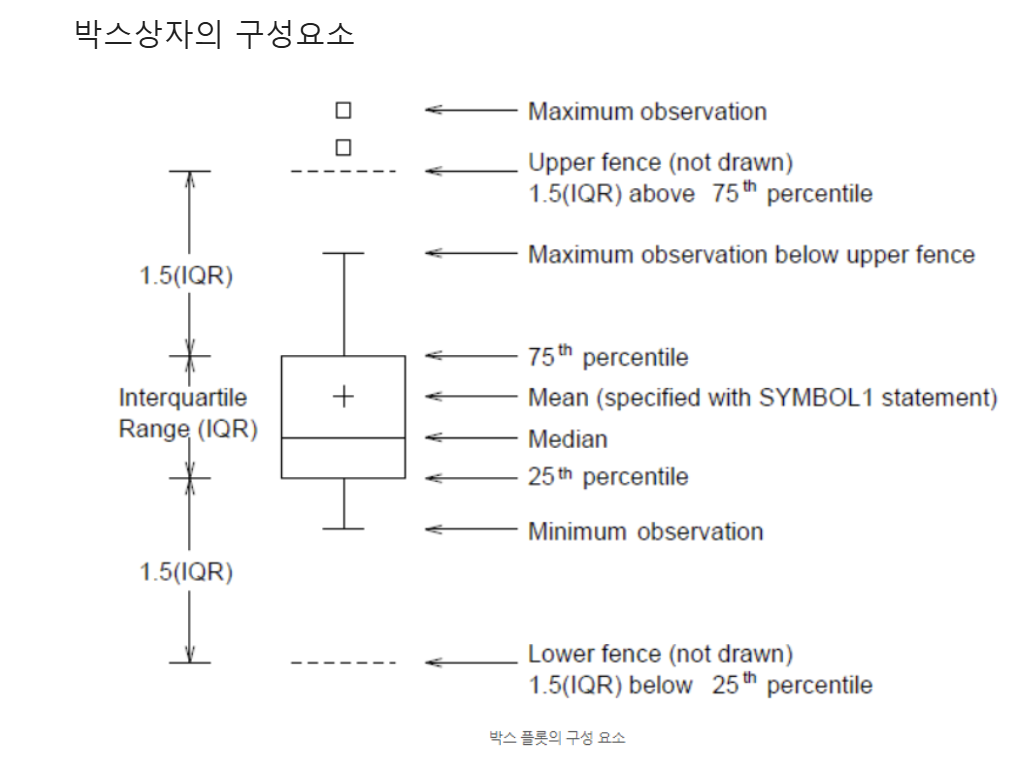

In [34]:
%config InlineBackend.figure_format = 'retina'

In [35]:
s = pd.Series([1, 2, 3, 4, 5])

In [36]:
s.quantile([.01, .25, .50, .75, 1])

,0
0.01,1.04
0.25,2.00
0.50,3.00
0.75,4.00
1.00,5.00


In [37]:
s.quantile([.25, .5, .75, 1])

,0
0.25,2.0
0.50,3.0
0.75,4.0
1.00,5.0


In [38]:
p25, p50, p75 = mpg['hwy'].quantile([.25, .5, .75])
p25

18.0

In [40]:
p50, p75

(24.0, 27.0)

In [41]:
iqr = p75 - p25
iqr

9.0

## lower fence


In [42]:
p25 - 1.5 * iqr  # 하한

4.5

## upper fence

In [43]:
p75 + 1.5 * iqr  # 상한

40.5

In [44]:
mpg['hwy'].describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [45]:
mpg['hwy'].describe()['25%']

np.float64(18.0)

In [46]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [47]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

np.int64(3)

In [48]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [50]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [51]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [52]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [53]:
mpg[ mpg['hwy'] > 40.5 ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [54]:
mpg.query( 'hwy > 40.5' )

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
